# leetcode 201 bitwise-and-of-numbers-range

题目链接：https://leetcode.com/problems/bitwise-and-of-numbers-range/
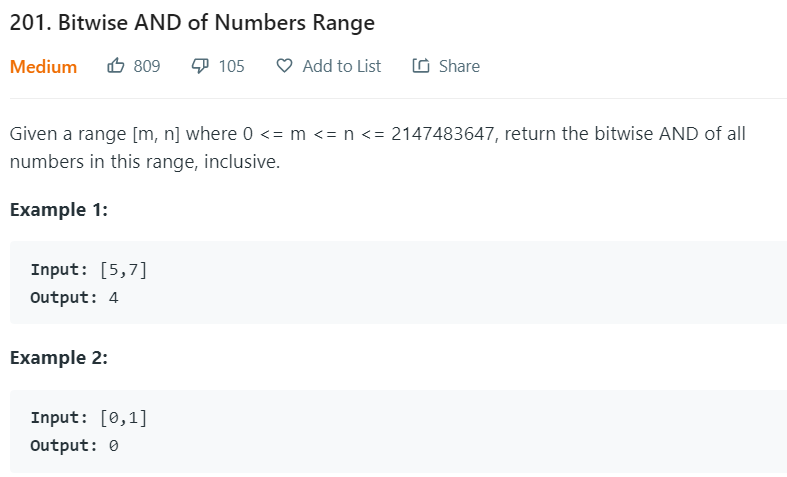

本题要求我们将给定区间[m,n]之间的数相与，返回最终的结果

解决本题的核心在于找出m和n二进制表示方式的相同前缀，之后根据n的位数补上相应的0

以题目给出的样例为例

0和1的二进制表示形式分别是00，01，他们的相同前缀就是0，最后的结果是00，即0

5和7的二进制表示形式分别是101，111，他们的相同前缀就是1，最后的结果是100.即4

下面简单地进行证明：
我们将m,n记作数组的形式，假设相同的前缀为i位，我们可以知道m,n之间的数都有相同的前缀，所以与操作结果不会影响前缀的结果，而只会影响后面不相同的部分，并且会变成全零的形式

不相同的部分从第i+1位开始，而且已知m < n,所以m[i] = 0， n[i] = 1

那我们可以的出结论，m和n之前必定包含了$$m[0：i]0\underset{全1}{11……1}$$和$$m[0:i]1\underset{全0}{00……0}$$这两个数，这两个数分别对应m的上限和n的下限，所以这两个数必定处于这个集合中，易知，他们相与的结果为$$\underset{全0}{00……0}$$，而这个数与其他数相与的结果也必然是$$\underset{全0}{00……0}$$。

具体实现：
我们可以通过右移操作，直到m和n相等为止，记录移位的次数，最后将m或者n左移相应的位置，即可得到最终的结果

代码如下：

In [1]:
class Solution:
    def rangeBitwiseAnd(self, m: int, n: int) -> int:
        step = 0
        while m != n:
            m >>= 1
            n >>= 1
            step += 1
            
        return m << step